In [62]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [63]:
mnist = keras.datasets.mnist

In [64]:
(feature_train, train_lable), (feature_test, test_lable) = mnist.load_data()

In [65]:
feature_train.shape, train_lable.shape , feature_test.shape, test_lable.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

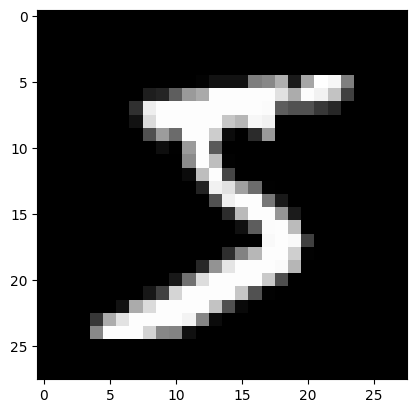

5

In [66]:
img = feature_train[0]


plt.gray()
plt.imshow(img)
plt.show()

train_lable[0]


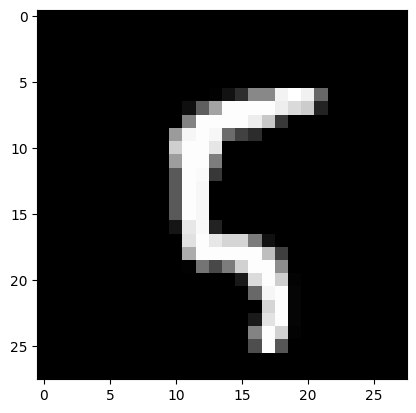

5

In [67]:
img = feature_train[100]


plt.gray()
plt.imshow(img)
plt.show()

train_lable[100]


## Preprocessing

In [68]:
np.min(img)

0

In [69]:
np.max(img)

255

In [70]:
feature_train =feature_train / 255.0


In [71]:
np.max(feature_train)

1.0

In [72]:
feature_test = feature_test / 255.0

In [73]:
np.max(feature_test)

1.0

## Model Selection

In [74]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units= 128, activation = 'relu'))
model.add(keras.layers.Dense(units= 128, activation = 'relu'))
model.add(keras.layers.Dense(units= 10, activation = 'softmax'))

In [75]:
model.compile(optimizer = 'adam', loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'] )

In [76]:
model.build(input_shape= (None, 28,28))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
history = model.fit(feature_train, train_lable, epochs = 100, batch_size = 256, validation_data=(feature_test, test_lable) )

Epoch 1/100
235/235 [==============================] - 3s 8ms/step - loss: 0.3932 - accuracy: 0.8923 - val_loss: 0.1808 - val_accuracy: 0.9470
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1536 - accuracy: 0.9556 - val_loss: 0.1269 - val_accuracy: 0.9613
Epoch 3/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1070 - accuracy: 0.9690 - val_loss: 0.1056 - val_accuracy: 0.9671
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0820 - accuracy: 0.9759 - val_loss: 0.0875 - val_accuracy: 0.9731
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0807 - val_accuracy: 0.9744
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0529 - accuracy: 0.9845 - val_loss: 0.0791 - val_accuracy: 0.9746
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0765 - val_accuracy: 0.976

In [78]:
model.evaluate(feature_test, test_lable)

313/313 [==============================] - 1s 2ms/step - loss: 0.1367 - accuracy: 0.9824


[0.13671986758708954, 0.9824000000953674]

In [79]:
idx = 40
test_lable[idx]


1

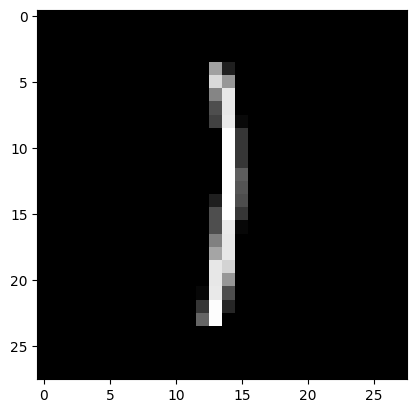

In [80]:
plt.gray()
plt.imshow(feature_test[40])
plt.show()

In [81]:
model.predict(np.reshape(feature_test[40], (-1,784)))

1/1 [==============================] - 0s 70ms/step


array([[2.1930858e-21, 1.0000000e+00, 1.4303569e-14, 3.7482889e-17,
        1.9215837e-13, 2.0724363e-16, 1.2364984e-16, 1.4517061e-12,
        6.9920591e-14, 3.3489875e-19]], dtype=float32)

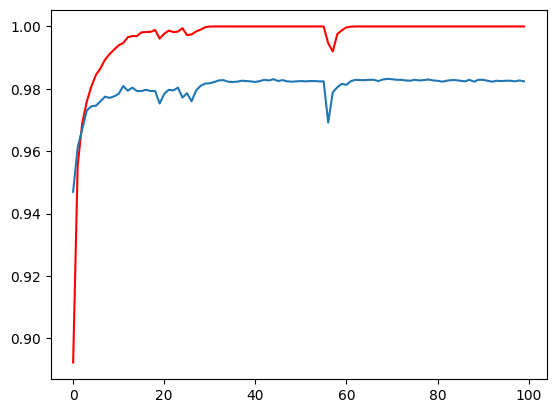

In [82]:
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'])
plt.show()

End!